# Predicting Bank Customer Churn using Machine Learning

## Introduction

Churn is defined as a measure of how many customers stop using a product or leave a service.

In this study, I aim to analyze the dataset "bank_customer_churn_dataset.csv" to:

- explore and visualize the factors which lead to bank customer churn
- train a machine learning model to predict if a customer churns or not
- provide actionable insights to the bank to reduce customer churn

## Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from utils.analysis import grouping
from utils.plotting import plot_subplots, plot_confusion_matrix
from utils.ml import benchmark_model

import warnings
warnings.filterwarnings('ignore')

RSEED = 42

## Loading the dataset

In [3]:
df = pd.read_csv('bank_customer_churn_dataset.csv')

## Data exploration

Examining the first 5 rows of the dataset:

In [4]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Examining the shape of the dataset shows that the dataset consists of 10000 rows and 12 columns:

In [5]:
df.shape

(10000, 12)

Examining the names of the columns and the datatype:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Examining the summary statistics of the dataset:

In [7]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


There are no null or missing values in the dataset, as shown below.

In [8]:
df.isna().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Now I examine the number of unique values for each column in the dataset. Columns with a small number of unique values with labelled data can be converted to the categorical datatype.

In [9]:
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

'customer_id' should be a unique identifier for each row therefore there are 10000 unique values, as expected.

'churn' is defined as the target variable, since we want to predict if a customer is churned or not.

Based on the summary statistics and the number of unique values of each column, the numerical variables are:
- credit_score
- age
- balance
- estimated_salary
- tenure
- products_number

and the categorical variables are:
- country
- gender
- credit_card
- active_member
- churn


## Data visualization

The percentage of churned customers is shown in the pie chart below.

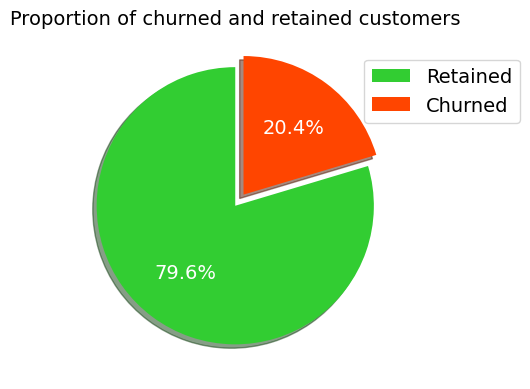

In [10]:
fig, ax = plt.subplots(figsize=(4.5,4.5))
plt.pie(df['churn'].value_counts(), explode=(0, 0.1), autopct='%1.1f%%', textprops={'color':"w",'size':14},
        shadow=True, startangle=90, colors=["limegreen", "orangered"], labels=["Retained","Churned"])
plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.35, 0.95))
plt.title('Proportion of churned and retained customers',fontsize=14)
plt.show()

The churn rate is also visualized for several discrete variables such as country, gender, credit card, active member, number of products and tenure:

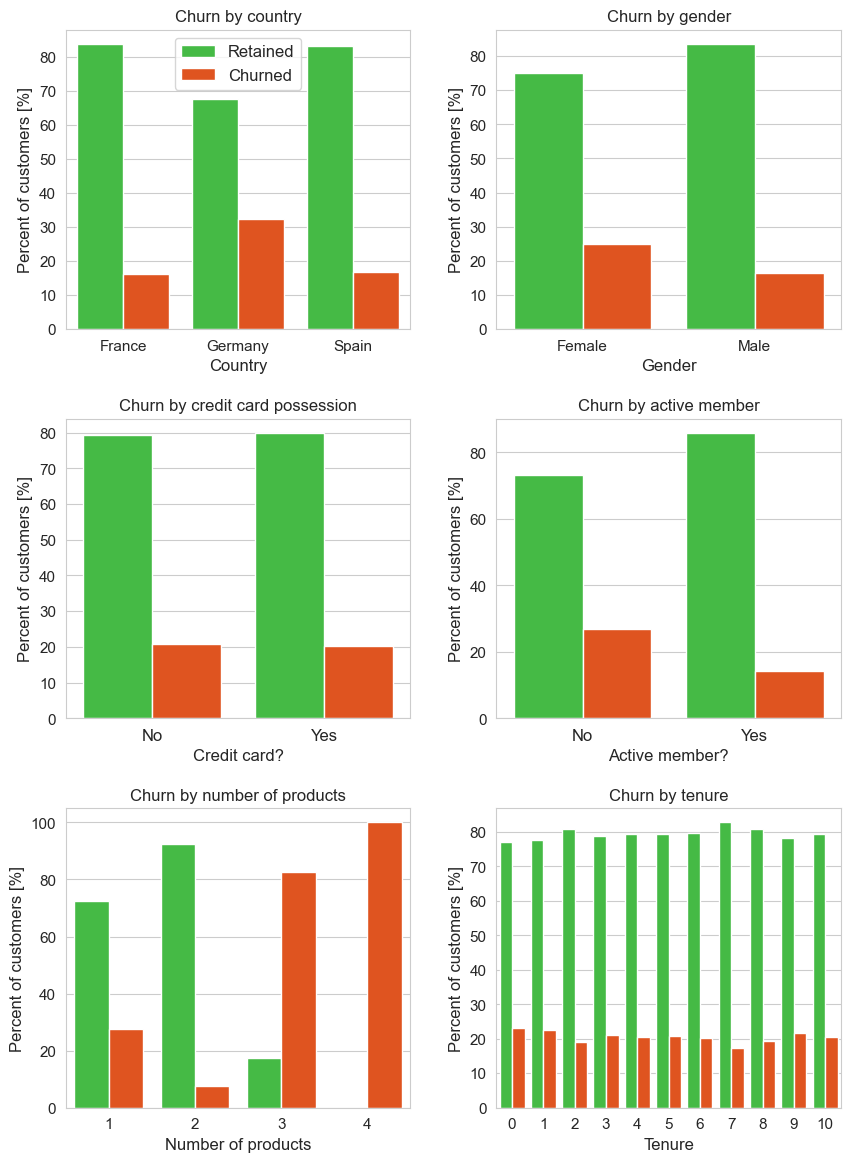

In [13]:
fontsize=12
color_palette = ["limegreen","orangered"]

sns.set_style("whitegrid")
fig, ax = plt.subplots(3, 2, figsize=(10,14))
plt.subplot(3, 2, 1)
ax=sns.barplot(x='country', y='percent', hue='churn', 
    data=grouping(df, 'country', 'churn', normalize=True), ci=None, palette=color_palette)
plot_subplots(ax, fontsize, 'Country', 'Churn by country', legend=True)

plt.subplot(3, 2, 2)
ax=sns.barplot(x='gender', y='percent', hue = 'churn', 
    data=grouping(df, 'gender', 'churn', normalize=True), palette=color_palette)
plot_subplots(ax, fontsize, 'Gender', 'Churn by gender', legend=False)

plt.subplot(3, 2, 3)
ax=sns.barplot(x='credit_card', y='percent', hue = 'churn', 
    data=grouping(df, 'credit_card', 'churn', normalize=True), palette=color_palette)
plot_subplots(ax, fontsize, 'Credit card?' ,'Churn by credit card possession', legend=False)
plt.xticks([0, 1], ["No","Yes"], fontsize=fontsize)

plt.subplot(3, 2, 4)
ax=sns.barplot(x='active_member', y='percent', hue = 'churn', 
    data=grouping(df, 'active_member', 'churn', normalize=True), palette=color_palette)
plot_subplots(ax, fontsize, 'Active member?' ,'Churn by active member', legend=False)
plt.xticks([0, 1], ["No","Yes"], fontsize=fontsize)

plt.subplot(3, 2, 5)
ax=sns.barplot(x='products_number', y='percent', hue = 'churn', 
    data=grouping(df, 'products_number', 'churn', normalize=True), palette=color_palette)
plot_subplots(ax, fontsize, 'Number of products' ,'Churn by number of products', legend=False)

plt.subplot(3, 2, 6)
ax=sns.barplot(x='tenure', y='percent', hue = 'churn', 
    data=grouping(df, 'tenure', 'churn', normalize=True), palette=color_palette)
plot_subplots(ax, fontsize, 'Tenure' ,'Churn by tenure', legend=False)

plt.subplots_adjust(hspace=0.3, wspace=0.25)
plt.show()

Based on the bar plots above, the following takeaways are observed:

- Germany has a higher churn rate compared to France and Spain.
- Female customers have a higher churn rate than male customers.
- There is no significant difference in the churn rate between customer with and without credit cards.
- Active members are less likely to churn.
- Customers with high number of products are very likely to churn.
- There is no significant trend in the length of tenure with churn rate.

Plotting the churn data as a function of age, bank balance, credit score and income, we get the following box plots:

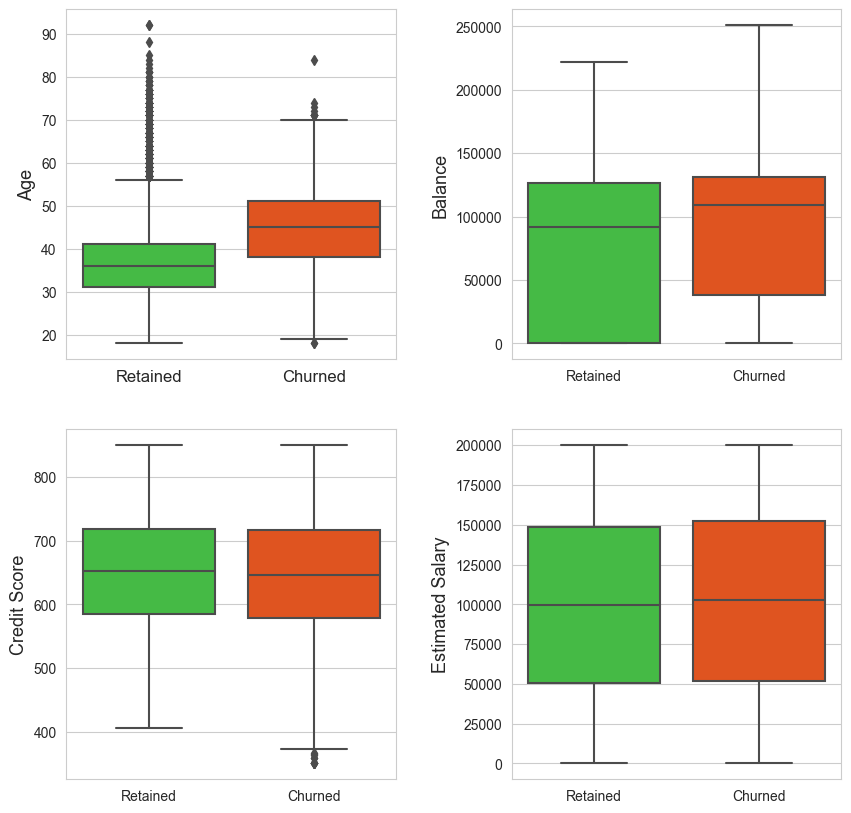

In [36]:
fontsize=13
sns.set_style("whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plt.subplot(2, 2, 1)
sns.boxplot(x=df['churn'], y=df["age"], palette=color_palette)
plt.xticks([0, 1], ["Retained", "Churned"], fontsize=fontsize-1)
plt.xlabel('')
plt.ylabel('Age', fontsize=fontsize)

plt.subplot(2, 2, 2)
sns.boxplot(x=df['churn'], y=df["balance"], palette=color_palette)
plt.xticks([0, 1], ["Retained", "Churned"])
plt.xlabel('')
plt.ylabel('Balance', fontsize=fontsize)

plt.subplot(2, 2, 3)
sns.boxplot(x=df['churn'], y=df["credit_score"], palette=color_palette)
plt.xticks([0, 1], ["Retained", "Churned"])
plt.xlabel('')
plt.ylabel('Credit Score', fontsize=fontsize)

plt.subplot(2, 2, 4)
sns.boxplot(x=df['churn'], y=df["estimated_salary"], palette=color_palette)
plt.xticks([0, 1], ["Retained", "Churned"])
plt.xlabel('')
plt.ylabel('Estimated Salary', fontsize=fontsize)

plt.subplots_adjust(hspace=0.2, wspace=0.35)
plt.show()

The best customers would have a high balance and a high number of products from the bank. A customer with a higher number of products means that bank can collect more fees from the customer. 

The "best" customers (high balance, high number of products) are also very likely to churn. Therefore the bank should focus on these customers.

The customers with zero balance who churn are less critical. 

Customers between age 40-50 are more likely to churn.

Even though France has the highest number of customers overall, Germany has the highest number of churners and the largest percentage of its customers that churn. 

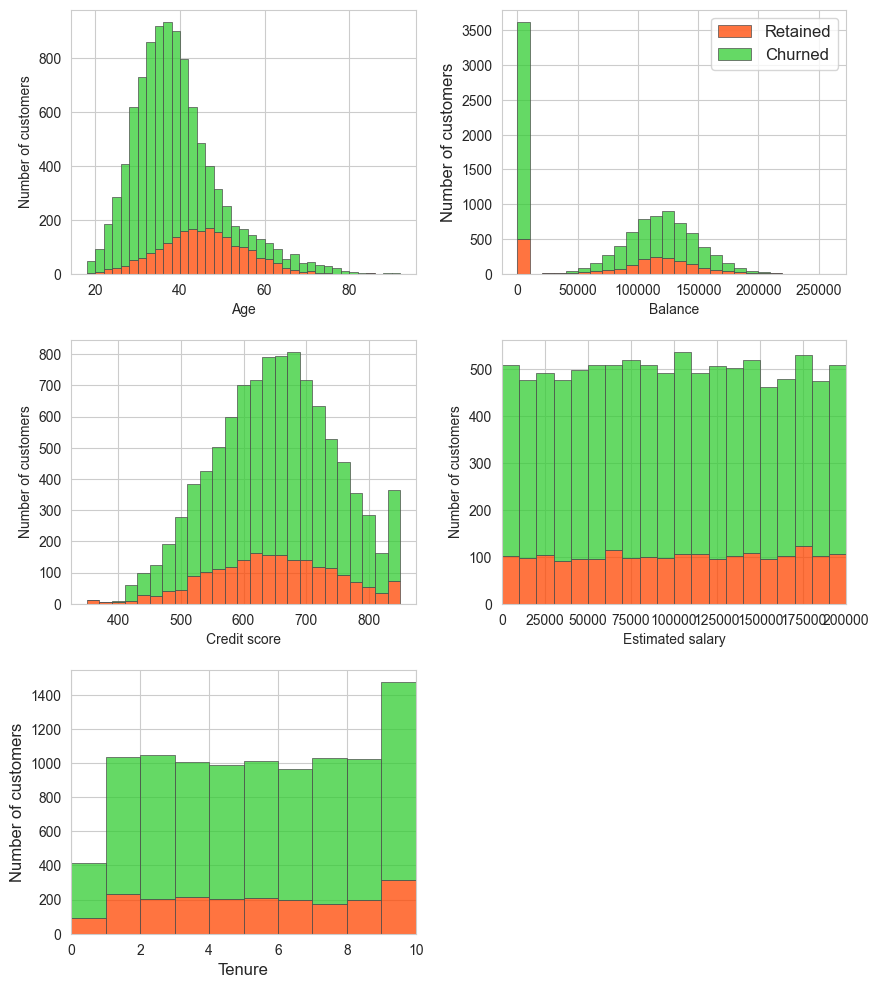

In [37]:
fontsize=12
fig, ax = plt.subplots(3,2,figsize=(10,12))
plt.subplot(3, 2, 1)
sns.histplot(df, x="age", hue="churn", binwidth=2, multiple="stack", palette=color_palette, edgecolor=".3", linewidth=.5)
plt.xlabel('Age')
plt.ylabel('Number of customers')
plt.legend([],[], frameon=False)

plt.subplot(3, 2, 2)
sns.histplot(df, x="balance", hue="churn", binwidth=10000, multiple="stack", palette=color_palette, edgecolor=".3", linewidth=.5)
plt.xlabel('Balance')
plt.ylabel('Number of customers',fontsize=fontsize)
plt.legend(["Retained","Churned"],fontsize=fontsize)

plt.subplot(3, 2, 3)
sns.histplot(df, x="credit_score", hue="churn", binwidth=20, multiple="stack", palette=color_palette, edgecolor=".3", linewidth=.5)
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.legend([],[], frameon=False)

plt.subplot(3, 2, 4)
sns.histplot(df, x="estimated_salary", hue="churn", binwidth=10000, multiple="stack", palette=color_palette, edgecolor=".3", linewidth=.5)
plt.xlim([0,200000])
plt.xlabel('Estimated salary')
plt.ylabel('Number of customers')
plt.legend([],[], frameon=False)

plt.subplot(3, 2, 5)
sns.histplot(df, x="tenure", hue="churn", binwidth=1, multiple="stack", palette=color_palette, edgecolor=".3", linewidth=.5)
plt.xlim([0, 10])
plt.xlabel('Tenure',fontsize=fontsize)
plt.ylabel('Number of customers',fontsize=fontsize)
plt.legend([],[], frameon=False)

ax = plt.subplot(3, 2, 6)
ax.axis('off')

plt.subplots_adjust(hspace=0.25, wspace=0.25)
plt.show()

### Takeaways from data visualization:
- The average age of churned customers appears to be higher than retained customers, which can be seen from the box plots and the histograms. The peak of the distribution for retained customers occurs between the ages 30-40, while the peak for churned customers occurs between ages 40-50.
- There are a significant number of customers with zero bank balance.
- There is no significant difference in the distribution between credit scores and estimated salary between retained and churned customers.

### Actionable insights:

- The customers that have a high balance and a high number of products from the bank are the highest value customers. The "best" customers (high balance, high number of products) are also very likely to churn. Therefore the bank should focus on preventing churn in these group of customers.

- The customers with zero balance who churn are less critical. 

- Even though France has the highest number of customers overall, Germany has the highest number of churners and the largest percentage of its customers that churn. A higher percentage of customers in Germany churn compared to France and Spain. The bank should investigate if there are other competitors within Germany that are offering a better product or better services.

- Customers that have a higher number of products are also more likely to churn. The bank should investigate if their fees are too high for their products compared to other competitors or if their competitors are offering more competitive products.

- Active customers are also less likely to churn. The bank should look into campaigns to engage their customers to encourage them to use their services or products more. There may be services or products that the customers are not aware of and thus are not using them.

## Modelling bank customer churn

We want to predict whether a customer churns or not, which is a binary outcome. Therefore this is a classification problem in machine learning.

A important point to take into consideration here is that we are dealing with an imbalanced dataset. If we use a baseline model where all customers are assumed to not have churned, this will still result in a model with 79.6% accuracy.

### Baseline model with original dataset

In the baseline model, we assume that no customers churn.

In [38]:
y_true = df['churn']
y_pred = np.zeros(df.shape[0])
print("Accuracy for baseline model: ", accuracy_score(y_true, y_pred))

Accuracy for baseline model:  0.7963


### Data preparation

I first prepare the data for input into our machine learning model. The steps that we take in order are:

1. Converting the columns to categorical datatype for later one-hot encoding
2. Defining the target and feature variables for the model. In this case the target variable is 'churn'
3. Converting the categorical features into dummy variables through one-hot encoding.
4. Splitting the data into a train set and a test set. A 70/30 train/test split was used in this case. This means that the model was trained on 70% of the dataset, and the final accuracy of the test data is used to evaluate the fit of the model.
5. Scaling the numerical features of the data.
6. Running a random search or a grid search with cross validation to find the optimal hyperparameters for the model
7. Finally, the model is trained and the accuracy of the model is evaluated. 


In [39]:
# Convert some columns to integer or categorical
df = df.assign(
    tenure=lambda x: x['tenure'].astype('int'),
    products_number=lambda x: x['products_number'].astype('int'),
    country=lambda x: x['country'].astype('category'),
    gender=lambda x: x['gender'].astype('category'),
    credit_card=lambda x: x['credit_card'].astype('category'),
    active_member=lambda x: x['active_member'].astype('category')
    )

# Defining target and feature variables
y = df['churn']
X = df.drop(['customer_id','churn'], axis=1)

# One hot encoding of categorical columns
col_dummy = list(X.dtypes[(X.dtypes == 'category')].index)
X_dum = pd.get_dummies(X[col_dummy], drop_first=True)
X.drop(col_dummy, axis=1, inplace=True)
X = pd.concat([X, X_dum], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RSEED)

# Scaling the data
col_scale = list(X.dtypes[(X.dtypes == 'float64') | (X.dtypes == 'int64')].index)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[col_scale] = scaler.fit_transform(X_train[col_scale])
X_test_scaled[col_scale] = scaler.transform(X_test[col_scale])


### Machine learning models

Now, I attempt to predict whether a customer has churned or not, which is a classification problem for supervised machine learning. For a classification problem, the following machine learning models were considered:
- Logistic regression
- KNN (k-nearest neighbors)
- Tree-based models (Decision tree, random forest, XGBoost, Adaboost, LightGBM, ...)

I chose to use **KNN** and **XGBoost** to predict customer churn. KNN is simple to understand while XGBoost typically achieves relatively good results without much hyperparameter tuning. KNN also requires scaling of the data, while XGBoost does not. I will also use both models on the original dataset and on a balanced dataset.

KNN (k-nearest neighbors) algorithm assumes that similar things exist in close proximity. Therefore, customers are grouped according to how similar they are to each other.

XGBoost is a gradient boosting decision tree algorithm. XGBoost utilizes decision trees and an ensemble technique where new models are added to correct the errors made by existing models. Gradient boosting is an approach where new decision trees are created that predict the residuals or errors of prior decision trees and then added together to make the final prediction.

SVM and Artificial Neural Network models typically require a lot of tuning and would not typically be the first model I would try.


### Defining useful functions:

In [40]:
# Initialize table with summary data for each model
summary_df = pd.DataFrame(columns=['model','accuracy','precision','recall','f1_score'])

# Function to concatenate summary data for each model
def summary_table(model_name, y_test, y_pred_test, summary_df):
    model_summary = pd.DataFrame(columns=['model','accuracy','precision','recall','f1_score'], index=[0])
    model_summary['model'] = model_name 
    model_summary['accuracy'] = accuracy_score(y_test, y_pred_test)
    model_summary['precision'] = precision_score(y_test, y_pred_test)
    model_summary['recall'] = recall_score(y_test, y_pred_test)
    model_summary['f1_score'] = f1_score(y_test, y_pred_test)
    summary_df = pd.concat([summary_df, model_summary], axis = 0)
    return summary_df


### KNN with original dataset

In [41]:
# Parameters for grid search cross validation
parameters = {'n_neighbors' : np.arange(2,31) }

# Instantiate the model
knn = KNeighborsClassifier()

# Grid search with cross validation to find optimum k-value
knn_gs = GridSearchCV(knn,                    # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10, verbose=1)          # number of folds

# Fit to training data
knn_gs.fit(X_train_scaled, y_train)

print("Best hyperparameters :", knn_gs.best_params_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
Best hyperparameters : {'n_neighbors': 15}


In [42]:
best_knn_model = knn_gs.best_estimator_
best_knn_params = knn_gs.best_params_

# Predict the churn for the train and test data
y_pred_train = best_knn_model.predict(X_train_scaled)
y_pred_test = best_knn_model.predict(X_test_scaled)

# Print accuracy score for train and test data
print("Accuracy (train data):", accuracy_score(y_train, y_pred_train).round(3))
print("Accuracy (test data):", accuracy_score(y_test, y_pred_test).round(3))

# Add model data to summary table
summary_df = summary_table('KNN', y_test, y_pred_test, summary_df)

Accuracy (train data): 0.863
Accuracy (test data): 0.851


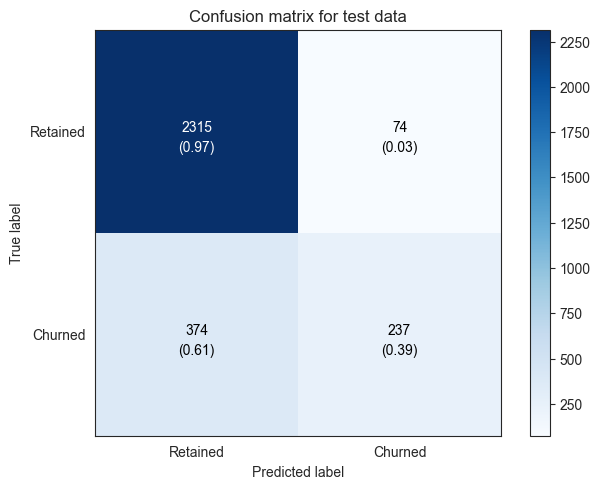

In [43]:
# Confusion matrix on train and test data
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), 
    classes=['Retained', 'Churned'], title='Confusion matrix for test data')

The confusion matrix above shows the number of true negatives (TN), false positives (FP), false negatives (FP) and true positives (TP). FP corresponds to customers predicted as churned when they are retained and FN corresponds to customers predicted as retained when they are actually churned. 



The confusion matrix shows that although a very high number of customers are correctly predicted as retained, but approximately 61% customers predicted as retained are actually churned. Due to the unbalanced nature of the dataset, the model also only predicts only 39% of churned customers correctly.

The accuracy in this case is calculated as the total number of correctly predicted values over the total number of values, which results in 0.85.

### XGBoost with original dataset

In [44]:
param_grid = {"learning_rate": [0.005, 0.01, 0.1, 0.2], 
              "max_depth": [3, 4, 5, 6],
              "n_estimators": [100, 150, 200]
             }

# Do a grid search
xgb_gs = GridSearchCV(
                estimator=XGBClassifier(random_state=RSEED),
                param_grid=param_grid,
                cv=10, verbose=1, n_jobs=-1)

# Fit train data
xgb_search = xgb_gs.fit(X_train, y_train) 

print("Tuned hyperparameters :", xgb_search.best_params_)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
Tuned hyperparameters : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


In [45]:
best_xgb_model = xgb_search.best_estimator_
best_xgb_params = xgb_search.best_params_

# Predict on train and test data
y_pred_train = best_xgb_model.predict(X_train)
y_pred_test = best_xgb_model.predict(X_test)

# Print accuracy score 
print("Accuracy (train):", accuracy_score(y_train, y_pred_train).round(3))
print("Accuracy (test):", accuracy_score(y_test, y_pred_test).round(3))

# Add model data to summary table
summary_df = summary_table('XGBoost', y_test, y_pred_test, summary_df)

Accuracy (train): 0.876
Accuracy (test): 0.87


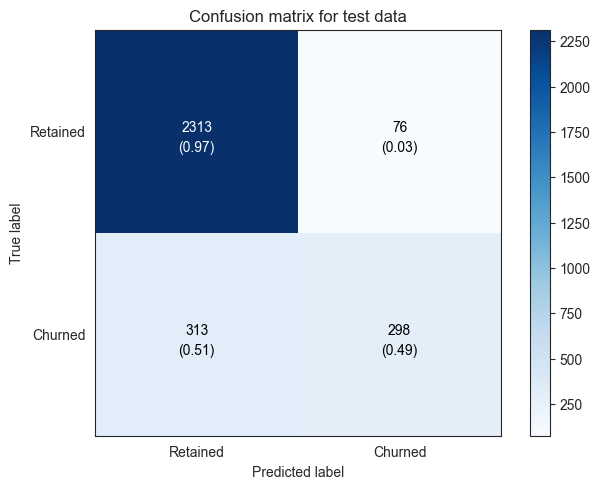

In [46]:
# Confusion matrix on train and test data
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), 
    classes=['Retained', 'Churned'], title='Confusion matrix for test data')

### Balanced dataset

The dataset consists of 7963 retained customers and 2037 churned customers. To create a balanced dataset, I randomly sampled 2037 values from the retained customers to create a balanced dataset consisting of 2037 retained customers and 2037 churned customers. The balanced dataset consists of 4074 rows.

With a baseline model that predicts that all customers are retained, then accuracy of this model would thus be 50%, which is random chance.

In [47]:
# Randomly sampled indices of retained customers
retained_indices = df[df['churn'] == 0].index.to_list()
rand_retained_indices = np.random.choice(retained_indices, 2037, replace=False)

# Row indices of churned customers
churned_indices = np.array(df[df['churn'] == 1].index)

# Balanced dataset indices
indices = np.concatenate((rand_retained_indices, churned_indices))

# Creating a dataset with balanced retained/churned class
df_balanced = df.loc[sorted(indices)]

In [48]:
# Defining target and feature variables
y_bal = df_balanced['churn']
X_bal = df_balanced.drop(['customer_id','churn'], axis=1)

# Creating dummy variables
col_dummy = list(X_bal.dtypes[(X_bal.dtypes == 'category')].index)
X_dum_bal = pd.get_dummies(X_bal[col_dummy], drop_first=True)
X_bal.drop(col_dummy, axis=1, inplace=True)
X_bal = pd.concat([X_bal, X_dum_bal], axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, stratify=y_bal, random_state=RSEED)

# Scaling the data
col_scale = list(X_bal.dtypes[(X_bal.dtypes == 'float64') | (X_bal.dtypes == 'int64')].index)
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[col_scale] = scaler.fit_transform(X_train[col_scale])
X_test_scaled[col_scale] = scaler.transform(X_test[col_scale])

### KNN with balanced dataset

In [49]:
# Parameters for grid search cross validation
parameters = {'n_neighbors' : np.arange(2,31) }

# Grid search with cross validation to find optimum k-value
knn_gs = GridSearchCV(KNeighborsClassifier(), # model
                   param_grid = parameters,   # hyperparameters
                   scoring='accuracy',        # metric for scoring
                   cv=10, verbose=1)          # number of folds

# Fit to training data
knn_gs.fit(X_train_scaled, y_train)

print("Tuned hyperparameters :", knn_gs.best_params_)

Fitting 10 folds for each of 29 candidates, totalling 290 fits
Tuned hyperparameters : {'n_neighbors': 13}


In [50]:
best_knn_bal = knn_gs.best_estimator_

# Predict the churn for the train and test data
y_pred_train = best_knn_bal.predict(X_train_scaled)
y_pred_test = best_knn_bal.predict(X_test_scaled)

# Print accuracy score for train and test data
print("Accuracy (train data):", accuracy_score(y_train, y_pred_train).round(3))
print("Accuracy (test data):", accuracy_score(y_test, y_pred_test).round(3))

summary_df = summary_table('KNN balanced', y_test, y_pred_test, summary_df)

Accuracy (train data): 0.798
Accuracy (test data): 0.781


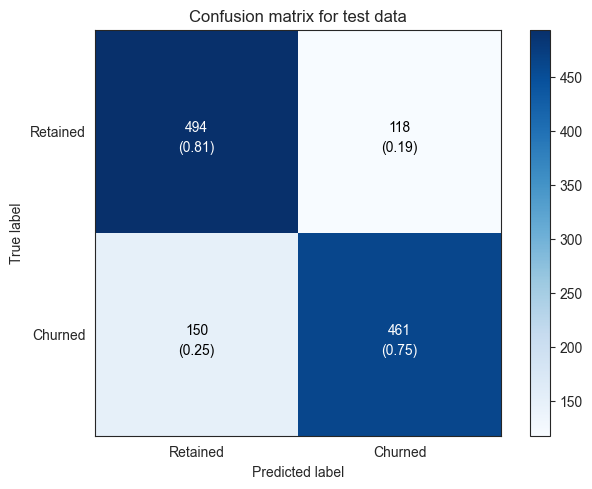

In [52]:
# Confusion matrix on train and test data
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), 
    classes=['Retained', 'Churned'], title='Confusion matrix for test data')

### XGBoost with balanced dataset

In [53]:
param_grid = {"learning_rate": [0.01, 0.02, 0.05],
              "max_depth": [3, 4, 5, 6],
              "n_estimators": [200, 250, 300, 350]
             }

# Do a grid search for optimal hyperparameters
xgb_gs = GridSearchCV(
                estimator=XGBClassifier(random_state=RSEED),
                param_grid=param_grid,
                cv=10, verbose=1, n_jobs=-1)

# Fit train data
xgb_search = xgb_gs.fit(X_train, y_train)     

print("Tuned hyperparameters :", knn_gs.best_params_)


Fitting 10 folds for each of 48 candidates, totalling 480 fits
Tuned hyperparameters : {'n_neighbors': 13}


In [29]:
best_xgb_bal = xgb_search.best_estimator_

# Predict on train and test data
y_pred_train = best_xgb_bal.predict(X_train)
y_pred_test = best_xgb_bal.predict(X_test)

# Print accuracy score 
print("Accuracy (train):", accuracy_score(y_train, y_pred_train).round(3))
print("Accuracy (test):", accuracy_score(y_test, y_pred_test).round(3))

summary_df = summary_table('XGBoost balanced', y_test, y_pred_test, summary_df)

Accuracy (train): 0.845
Accuracy (test): 0.775


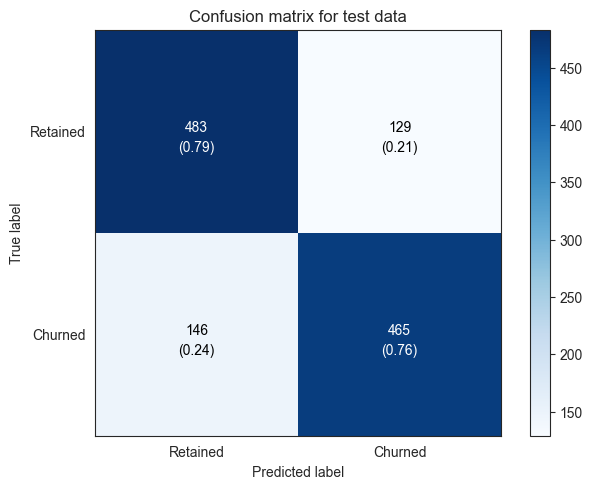

In [30]:
# Confusion matrix on train and test data
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), 
    classes=['Retained', 'Churned'], title='Confusion matrix for test data')

## Comparison of results

In [31]:
summary_df

,model,accuracy,precision,recall,f1_score
0,KNN,0.850667,0.762058,0.387889,0.514100
0,XGBoost,0.870333,0.796791,0.487725,0.605076
0,KNN balanced,0.750613,0.756711,0.738134,0.747307
0,XGBoost balanced,0.775143,0.782828,0.761047,0.771784


The definitions of the metrics in the table above are:

Precision: $\frac{TP}{TP+FP}$ (
Proportion of positive predictions that are actually correct)

Recall: $\frac{TP}{TP+FN}$
(Proportion of actual predictions that were predicted correctly)

F1-score: $2\frac{Precision \cdot Recall}{Precision + Recall}$

And the TP and FN values correspond to the confusion matrix as follows:

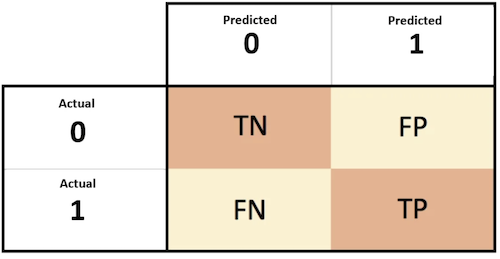

The models trained on the original dataset are compared to a baseline accuracy of 79.6%, while the models trained on the balanced dataset are compared to a baseline accuracy of 50%. The models trained on the balanced dataset also have a much higher recall and f1-score compared to the models trained on the original dataset.

Even though the overall calculated accuracy for the original and balanced data set appear to be similar, the confusion matrix shows that the model with the balanced dataset was better at correctly predicting the true positive (TP) and true negatives (TN).

## Feature importance

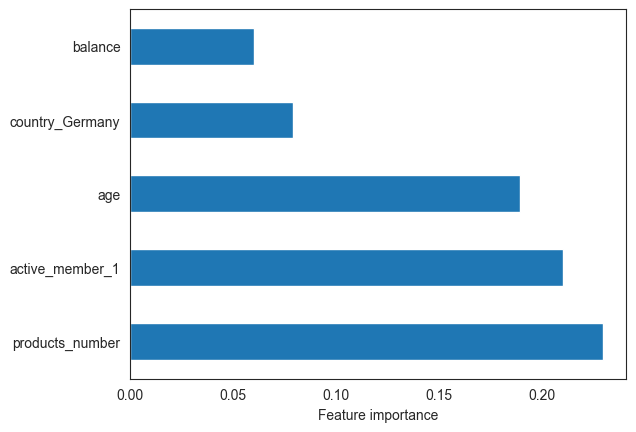

In [32]:
feat_importances = pd.Series(best_xgb_bal.feature_importances_, index=X_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel('Feature importance')
plt.show()

According to the fitted XGBoost model on the balanced data, the above plot shows the top 5 most important features in predicting customer churn. 